I originally tested the model provided in the notes: 
# Propertycrime=α+Population+Population2+Murder+Robbery

modeled_property_crime = data_numeric['pop_num'] + data_numeric['pop_squared'] + data_numeric['Murder_Cat'] + data_numeric['robbery_cat']



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Grab and process the raw data.
data_path = ("known_offenses_nyc2013.csv")

In [3]:
data_raw = pd.read_csv(data_path)

In [4]:
data_raw

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [5]:
data_raw.dtypes

City                                       object
Population                                 object
Violent\rcrime                             object
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2                object
Robbery                                    object
Aggravated\rassault                        object
Property\rcrime                            object
Burglary                                   object
Larceny-\rtheft                            object
Motor\rvehicle\rtheft                      object
Arson3                                    float64
Unnamed: 13                               float64
dtype: object

# Creating the columns for Population, Population^2, Categorical for Murder and Robbery

In [6]:
# pd.Series(['foo', 'fuz', np.nan]).str.replace('f', repr)
data_raw['pop_num'] = pd.to_numeric(data_raw['Population'].str.replace(',',''))

In [7]:
data_raw['pop_squared']=data_raw['pop_num']**2

Murder Column is already in float form

In [8]:
data_raw['Murder_Cat'] = np.where((data_raw['Murder and\rnonnegligent\rmanslaughter'] > 0),1,0)

In [9]:
# Change to numeric the following categories: Robbery, 

# Stop here and clean up Robbery Number and Category

In [10]:
# Convert mv_data['Robbery'] to number, then categorical

data_raw['robbery_num'] = pd.to_numeric(data_raw['Robbery'].str.replace(',',''))

In [11]:
data_raw.dtypes

City                                       object
Population                                 object
Violent\rcrime                             object
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2                object
Robbery                                    object
Aggravated\rassault                        object
Property\rcrime                            object
Burglary                                   object
Larceny-\rtheft                            object
Motor\rvehicle\rtheft                      object
Arson3                                    float64
Unnamed: 13                               float64
pop_num                                   float64
pop_squared                               float64
Murder_Cat                                  int64
robbery_num                               float64
dtype: object

In [12]:
data_raw['Violent\rcrime'] = pd.to_numeric(data_raw['Violent\rcrime'].str.replace(',',''))

In [13]:
# Rape\r(legacy\rdefinition)2
data_raw['Rape\r(legacy\rdefinition)2'] = pd.to_numeric(data_raw['Rape\r(legacy\rdefinition)2'].str.replace(',',''))

Aggravated\rassault                        object
Property\rcrime                            object
Burglary                                   object
Larceny-\rtheft                            object
Motor\rvehicle\rtheft                      object

In [14]:
data_raw['Aggravated\rassault'] = pd.to_numeric(data_raw['Aggravated\rassault'].str.replace(',',''))
data_raw['Property\rcrime'] = pd.to_numeric(data_raw['Property\rcrime'].str.replace(',',''))
data_raw['Burglary'] = pd.to_numeric(data_raw['Burglary'].str.replace(',',''))
data_raw['Larceny-\rtheft'] = pd.to_numeric(data_raw['Larceny-\rtheft'].str.replace(',',''))
data_raw['Motor\rvehicle\rtheft'] = pd.to_numeric(data_raw['Motor\rvehicle\rtheft'].str.replace(',',''))

In [15]:
data_raw['robbery_cat'] = np.where((data_raw['robbery_num'] > 0),1,0)

In [16]:
data_raw

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,861",0.000,0.000,nan,0.000,0,0.000,12.000,2.000,10.000,0.000,0.000,nan,1861.000,3463321.000,0,0.000,0
1,Addison Town and Village,"2,577",3.000,0.000,nan,0.000,0,3.000,24.000,3.000,20.000,1.000,0.000,nan,2577.000,6640929.000,0,0.000,0
2,Akron Village,"2,846",3.000,0.000,nan,0.000,0,3.000,16.000,1.000,15.000,0.000,0.000,nan,2846.000,8099716.000,0,0.000,0
3,Albany,"97,956",791.000,8.000,nan,30.000,227,526.000,4090.000,705.000,3243.000,142.000,nan,nan,97956.000,9595377936.000,1,227.000,1
4,Albion Village,"6,388",23.000,0.000,nan,3.000,4,16.000,223.000,53.000,165.000,5.000,nan,nan,6388.000,40806544.000,0,4.000,1
5,Alfred Village,"4,089",5.000,0.000,nan,0.000,3,2.000,46.000,10.000,36.000,0.000,nan,nan,4089.000,16719921.000,0,3.000,1
6,Allegany Village,"1,781",3.000,0.000,nan,0.000,0,3.000,10.000,0.000,10.000,0.000,0.000,nan,1781.000,3171961.000,0,0.000,0
7,Amherst Town,"118,296",107.000,1.000,nan,7.000,31,68.000,2118.000,204.000,1882.000,32.000,3.000,nan,118296.000,13993943616.000,1,31.000,1
8,Amityville Village,"9,519",9.000,0.000,nan,2.000,4,3.000,210.000,16.000,188.000,6.000,1.000,nan,9519.000,90611361.000,0,4.000,1
9,Amsterdam,"18,182",30.000,0.000,nan,0.000,12,18.000,405.000,99.000,291.000,15.000,0.000,nan,18182.000,330585124.000,0,12.000,1


In [17]:
data_numeric = data_raw[:-3]

In [18]:
data_numeric

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,861",0.000,0.000,nan,0.000,0,0.000,12.000,2.000,10.000,0.000,0.000,nan,1861.000,3463321.000,0,0.000,0
1,Addison Town and Village,"2,577",3.000,0.000,nan,0.000,0,3.000,24.000,3.000,20.000,1.000,0.000,nan,2577.000,6640929.000,0,0.000,0
2,Akron Village,"2,846",3.000,0.000,nan,0.000,0,3.000,16.000,1.000,15.000,0.000,0.000,nan,2846.000,8099716.000,0,0.000,0
3,Albany,"97,956",791.000,8.000,nan,30.000,227,526.000,4090.000,705.000,3243.000,142.000,nan,nan,97956.000,9595377936.000,1,227.000,1
4,Albion Village,"6,388",23.000,0.000,nan,3.000,4,16.000,223.000,53.000,165.000,5.000,nan,nan,6388.000,40806544.000,0,4.000,1
5,Alfred Village,"4,089",5.000,0.000,nan,0.000,3,2.000,46.000,10.000,36.000,0.000,nan,nan,4089.000,16719921.000,0,3.000,1
6,Allegany Village,"1,781",3.000,0.000,nan,0.000,0,3.000,10.000,0.000,10.000,0.000,0.000,nan,1781.000,3171961.000,0,0.000,0
7,Amherst Town,"118,296",107.000,1.000,nan,7.000,31,68.000,2118.000,204.000,1882.000,32.000,3.000,nan,118296.000,13993943616.000,1,31.000,1
8,Amityville Village,"9,519",9.000,0.000,nan,2.000,4,3.000,210.000,16.000,188.000,6.000,1.000,nan,9519.000,90611361.000,0,4.000,1
9,Amsterdam,"18,182",30.000,0.000,nan,0.000,12,18.000,405.000,99.000,291.000,15.000,0.000,nan,18182.000,330585124.000,0,12.000,1


In [19]:
data_numeric.dtypes

City                                       object
Population                                 object
Violent\rcrime                            float64
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2               float64
Robbery                                    object
Aggravated\rassault                       float64
Property\rcrime                           float64
Burglary                                  float64
Larceny-\rtheft                           float64
Motor\rvehicle\rtheft                     float64
Arson3                                    float64
Unnamed: 13                               float64
pop_num                                   float64
pop_squared                               float64
Murder_Cat                                  int64
robbery_num                               float64
robbery_cat                                 int64
dtype: object

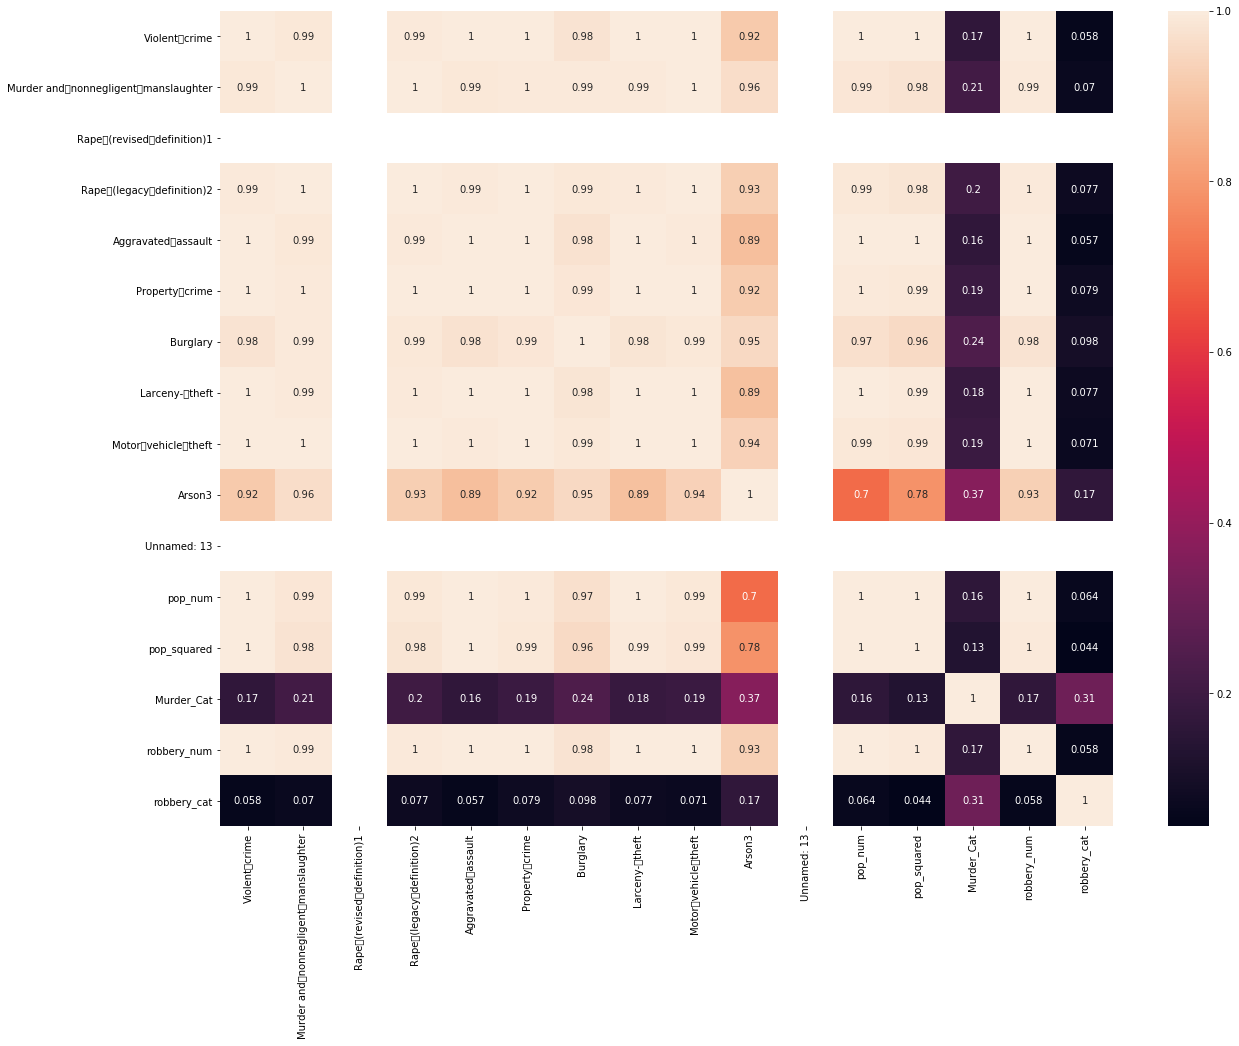

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_numeric.corr(), annot=True)

# A hypothetical model (from the notes)

In [21]:
# Propertycrime=α+Population+Population2+Murder+Robbery

modeled_property_crime = data_numeric['pop_num'] + data_numeric['pop_squared'] + data_numeric['Murder_Cat'] + data_numeric['robbery_cat']



# Figure out how to make a predictive model based on the above info

# Extract predicted values.





In [22]:
regr = linear_model.LinearRegression()
Y = data_numeric['Property\rcrime'].values.reshape(-1, 1)

In [23]:
X = data_numeric[['pop_num','Murder_Cat','robbery_cat']]
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
predicted = regr.predict(X).ravel()
actual = data_numeric['Property\rcrime']

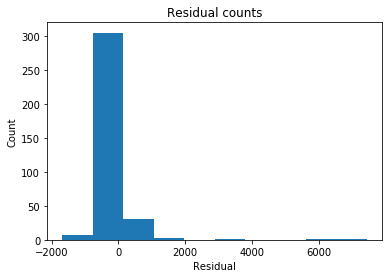

In [25]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Strong R_squared value down below. Will try another model, too.

In [26]:
### Inspect the results.
print('\nCoefficients: Population, Murder Category, Robbery Category \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: Population, Murder Category, Robbery Category 
 [[1.68728222e-02 6.07383740e+02 1.06994709e+02]]

Intercept: 
 [-32.72226824]

R-squared:
0.99344854357257


# Now compare to murder and robbery numbers and see what happens

In [27]:
regr = linear_model.LinearRegression()
Y = data_numeric['Property\rcrime'].values.reshape(-1, 1)
X_with_thenums = data_numeric[['pop_num','Murder and\rnonnegligent\rmanslaughter','robbery_num']]
regr.fit(X_with_thenums, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
predicted = regr.predict(X).ravel()
actual = data_numeric['Property\rcrime']

# Skewed to the right

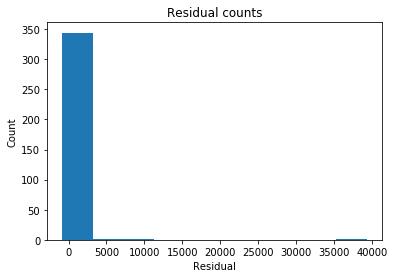

In [29]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Even less correlated with the real population numbers- because it's not as binary as the 1/0 Cat?

In [30]:
### Inspect the results.
print('\nCoefficients: Population, Murder Category, Robbery Category \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: Population, Murder Category, Robbery Category 
 [[ 1.21875569e-02  2.28489351e+02 -1.92388628e+00]]

Intercept: 
 [87.06579771]

R-squared:
0.9148686445018487


In [31]:
# Looking at linear relationships between variables
# One outlier is screwing up the graph

In [32]:
data_numeric['Property\rcrime'].describe()

count      348.000
mean       792.606
std       7659.725
min          0.000
25%         40.500
50%        112.500
75%        341.000
max     141971.000
Name: Property\rcrime, dtype: float64

# Remove that outlier at 141,971

In [33]:
# df.drop(['Cochice', 'Pima'])
# data_numeric.max()
data_numeric[(data_numeric['Property\rcrime'] == 141971.000)]
data_numeric[data_numeric.City != 'New York'].max()

City                                       Yorktown Town
Population                                           997
Violent\rcrime                                  3249.000
Murder and\rnonnegligent\rmanslaughter            47.000
Rape\r(revised\rdefinition)1                        None
Rape\r(legacy\rdefinition)2                      145.000
Robbery                                              918
Aggravated\rassault                             1735.000
Property\rcrime                                12491.000
Burglary                                        3458.000
Larceny-\rtheft                                 8076.000
Motor\rvehicle\rtheft                            957.000
Arson3                                           132.000
Unnamed: 13                                         None
pop_num                                       258789.000
pop_squared                              66971746521.000
Murder_Cat                                             1
robbery_num                    

In [34]:
# data_numeric.drop(data_numeric['Property\rcrime'] == 141971.000)
# data_numeric['City']=='New York'
data_numeric[(data_numeric['Property\rcrime'] > 15000)]
# data_numeric.index[216]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
216,New York,"8,396,126",52384.000,335.000,nan,1112.000,"19,170",31767.000,141971.000,16606.000,117931.000,7434.000,nan,nan,8396126.000,70494931807876.000,1,19170.000,1


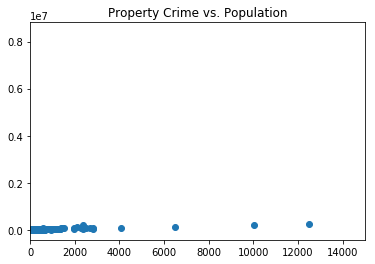

In [35]:
# Sample data.
outcome = data_numeric['Property\rcrime']
feature = data_numeric['pop_num']

plt.xlim(0, 15000)
plt.scatter(outcome, feature)
plt.title('Property Crime vs. Population')
plt.show()

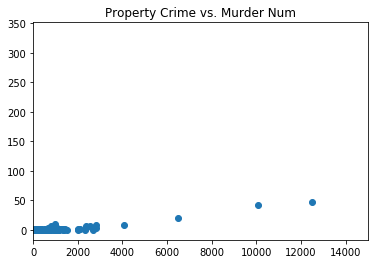

In [36]:
# Sample data.
outcome = data_numeric['Property\rcrime']
feature = data_numeric['Murder and\rnonnegligent\rmanslaughter']

plt.scatter(outcome, feature)
plt.xlim(0, 15000)
plt.title('Property Crime vs. Murder Num')
plt.show()

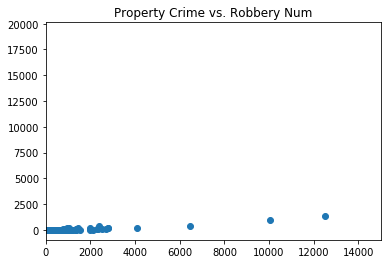

In [37]:
# Sample data.
outcome = data_numeric['Property\rcrime']
feature = data_numeric['robbery_num']

plt.xlim(0, 15000)
plt.scatter(outcome, feature)
plt.title('Property Crime vs. Robbery Num')
plt.show()

In [40]:
# I want to drop this row
data_numeric[(data_numeric['City'] != 'New York')]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,861",0.000,0.000,nan,0.000,0,0.000,12.000,2.000,10.000,0.000,0.000,nan,1861.000,3463321.000,0,0.000,0
1,Addison Town and Village,"2,577",3.000,0.000,nan,0.000,0,3.000,24.000,3.000,20.000,1.000,0.000,nan,2577.000,6640929.000,0,0.000,0
2,Akron Village,"2,846",3.000,0.000,nan,0.000,0,3.000,16.000,1.000,15.000,0.000,0.000,nan,2846.000,8099716.000,0,0.000,0
3,Albany,"97,956",791.000,8.000,nan,30.000,227,526.000,4090.000,705.000,3243.000,142.000,nan,nan,97956.000,9595377936.000,1,227.000,1
4,Albion Village,"6,388",23.000,0.000,nan,3.000,4,16.000,223.000,53.000,165.000,5.000,nan,nan,6388.000,40806544.000,0,4.000,1
5,Alfred Village,"4,089",5.000,0.000,nan,0.000,3,2.000,46.000,10.000,36.000,0.000,nan,nan,4089.000,16719921.000,0,3.000,1
6,Allegany Village,"1,781",3.000,0.000,nan,0.000,0,3.000,10.000,0.000,10.000,0.000,0.000,nan,1781.000,3171961.000,0,0.000,0
7,Amherst Town,"118,296",107.000,1.000,nan,7.000,31,68.000,2118.000,204.000,1882.000,32.000,3.000,nan,118296.000,13993943616.000,1,31.000,1
8,Amityville Village,"9,519",9.000,0.000,nan,2.000,4,3.000,210.000,16.000,188.000,6.000,1.000,nan,9519.000,90611361.000,0,4.000,1
9,Amsterdam,"18,182",30.000,0.000,nan,0.000,12,18.000,405.000,99.000,291.000,15.000,0.000,nan,18182.000,330585124.000,0,12.000,1


In [41]:
df_no_nyc = data_numeric[(data_numeric['City'] != 'New York')]

In [42]:
df_no_nyc

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,861",0.000,0.000,nan,0.000,0,0.000,12.000,2.000,10.000,0.000,0.000,nan,1861.000,3463321.000,0,0.000,0
1,Addison Town and Village,"2,577",3.000,0.000,nan,0.000,0,3.000,24.000,3.000,20.000,1.000,0.000,nan,2577.000,6640929.000,0,0.000,0
2,Akron Village,"2,846",3.000,0.000,nan,0.000,0,3.000,16.000,1.000,15.000,0.000,0.000,nan,2846.000,8099716.000,0,0.000,0
3,Albany,"97,956",791.000,8.000,nan,30.000,227,526.000,4090.000,705.000,3243.000,142.000,nan,nan,97956.000,9595377936.000,1,227.000,1
4,Albion Village,"6,388",23.000,0.000,nan,3.000,4,16.000,223.000,53.000,165.000,5.000,nan,nan,6388.000,40806544.000,0,4.000,1
5,Alfred Village,"4,089",5.000,0.000,nan,0.000,3,2.000,46.000,10.000,36.000,0.000,nan,nan,4089.000,16719921.000,0,3.000,1
6,Allegany Village,"1,781",3.000,0.000,nan,0.000,0,3.000,10.000,0.000,10.000,0.000,0.000,nan,1781.000,3171961.000,0,0.000,0
7,Amherst Town,"118,296",107.000,1.000,nan,7.000,31,68.000,2118.000,204.000,1882.000,32.000,3.000,nan,118296.000,13993943616.000,1,31.000,1
8,Amityville Village,"9,519",9.000,0.000,nan,2.000,4,3.000,210.000,16.000,188.000,6.000,1.000,nan,9519.000,90611361.000,0,4.000,1
9,Amsterdam,"18,182",30.000,0.000,nan,0.000,12,18.000,405.000,99.000,291.000,15.000,0.000,nan,18182.000,330585124.000,0,12.000,1


# Now that we have the dataframe w/out that high outlier, run the model again. The results here are our actual Property Crime numbers.

In [43]:
regr = linear_model.LinearRegression()
Y = df_no_nyc['Property\rcrime'].values.reshape(-1, 1)
X_with_thenums = df_no_nyc[['pop_num','Murder and\rnonnegligent\rmanslaughter','robbery_num']]
regr.fit(X_with_thenums, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
predicted = regr.predict(X).ravel()
actual = data_numeric['Property\rcrime']

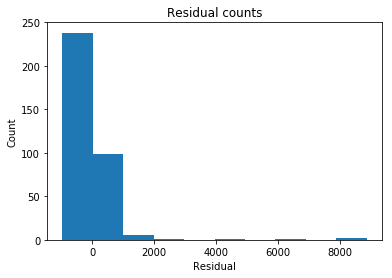

In [45]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Now we have data way skewed to the right, and we will adjust by applying either log or sqrt adjustments to the data

In [51]:
sqrt_data = np.sqrt(data_numeric['Property\rcrime'])

In [52]:
actual = sqrt_data

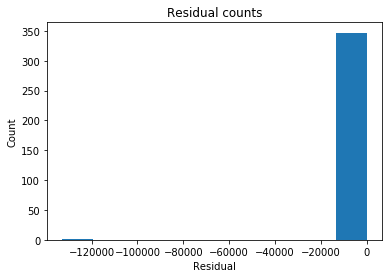

In [53]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Well, this is kind of horizontal

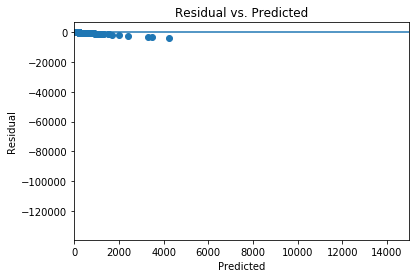

In [56]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0, 15000)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#  Better R-squared value

In [55]:
# X_with_thenums = df_no_nyc[['pop_num','Murder and\rnonnegligent\rmanslaughter','robbery_num']]
# Inspect the results.
print('\nCoefficients: Population Num, Murder, Robbery \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_with_thenums, Y))


Coefficients: Population Num, Murder, Robbery 
 [[1.58354338e-02 1.18437047e+02 2.02472175e+00]]

Intercept: 
 [25.21793454]

R-squared:
0.9305586206386044


# Trying to come up w/ a model that has non-property crime features (to avoid something like recursion) that is a decent predictor. Using: rape, murder, population:
- Murder and\rnonnegligent\rmanslaughter
- Rape\r(legacy\rdefinition)2
- pop_squared (population squared)

In [58]:
df_no_nyc.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3', 'Unnamed: 13',
       'pop_num', 'pop_squared', 'Murder_Cat', 'robbery_num', 'robbery_cat'],
      dtype='object')

In [63]:
regr = linear_model.LinearRegression()
Y = df_no_nyc['Property\rcrime'].values.reshape(-1, 1)

In [64]:
# create a new model w/ different features

In [65]:
X_model2 = df_no_nyc[['pop_squared','Rape\r(legacy\rdefinition)2','Murder and\rnonnegligent\rmanslaughter']]
regr.fit(X_model2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
predicted = regr.predict(X_model2).ravel()
actual = df_no_nyc['Property\rcrime']

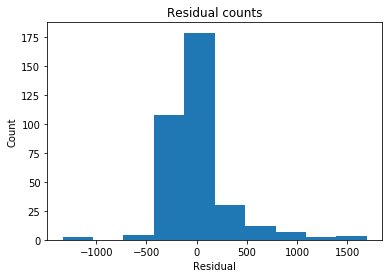

In [67]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [68]:
# Above is skewed a bit to the right

# Similar R_squared value

In [69]:
# X_with_thenums = df_no_nyc[['pop_num','Murder and\rnonnegligent\rmanslaughter','robbery_num']]
# Inspect the results.
print('\nCoefficients: Population Squared, Rape, Murder \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_model2, Y))


Coefficients: Population Squared, Rape, Murder 
 [[4.52808256e-08 6.39111912e+01 2.60216835e+01]]

Intercept: 
 [154.25930965]

R-squared:
0.9134271481299088


# Treat data with square root

In [70]:
actual = np.sqrt(df_no_nyc['Property\rcrime'])

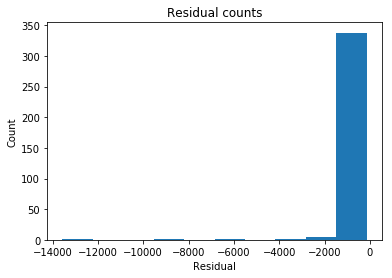

In [71]:
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [72]:
# X_with_thenums = df_no_nyc[['pop_num','Murder and\rnonnegligent\rmanslaughter','robbery_num']]
# Inspect the results.
print('\nCoefficients: Population Squared, Rape, Murder \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_model2, Y))


Coefficients: Population Squared, Rape, Murder 
 [[4.52808256e-08 6.39111912e+01 2.60216835e+01]]

Intercept: 
 [154.25930965]

R-squared:
0.9134271481299088
